# Assignment01

## 라이브러리

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
tada_eta = pd.read_excel('/content/drive/MyDrive/프로그래밍_교육/쏘카 ai 엔지니어 육성 부트캠프 2기/강의/assignment01/tada_eta.xlsx')
tada_eta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13916 entries, 0 to 13915
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ATA             13916 non-null  float64
 1   id              13916 non-null  object 
 2   api_eta         13916 non-null  float64
 3   created_at_kst  13916 non-null  object 
 4   month           13916 non-null  int64  
 5   pickup_lng      13916 non-null  float64
 6   pickup_lat      13916 non-null  float64
 7   pickup_gu       13916 non-null  object 
 8   driver_id       13916 non-null  object 
 9   driver_lng      13916 non-null  float64
 10  driver_lat      13916 non-null  float64
 11  hour            13916 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 1.3+ MB


## EDA

In [7]:
tada_eta.describe()

,ATA,api_eta,month,pickup_lng,pickup_lat,driver_lng,driver_lat,hour
count,13916.000000,13916.000000,13916.000000,13916.000000,13916.000000,13916.000000,13916.000000,13916.000000
mean,8.386438,6.172346,10.146019,127.002390,37.527512,126.956952,37.514084,13.278672
std,4.094109,3.151074,2.415177,0.057423,0.031143,2.407714,0.711941,6.971578
min,0.430000,0.000000,7.000000,126.798391,37.439779,0.000000,0.000000,0.000000
25%,5.470000,3.800000,7.000000,126.969020,37.503890,126.967620,37.503930,8.000000
50%,7.780000,5.950000,12.000000,127.013602,37.523343,127.013432,37.522791,14.000000
75%,10.520000,8.180000,12.000000,127.040485,37.551443,127.041342,37.551953,19.000000
max,44.780000,25.280000,12.000000,127.174993,37.686526,127.174070,37.683888,23.000000


In [8]:
tada_eta.head()

,ATA,id,api_eta,created_at_kst,month,pickup_lng,pickup_lat,pickup_gu,driver_id,driver_lng,driver_lat,hour
0,10.60,R4L9FL6NVEL4D0,5.65,2019-12-01T00:55:09,12,127.091399,37.624545,노원구,DST52944,127.069978,37.616472,0
1,9.20,R3A7JBY7CS6TPD,8.60,2019-12-01T00:09:39,12,127.023351,37.625564,강북구,DPC72995,127.026479,37.604711,0
2,10.85,R2BIUY1TDK14XE,10.53,2019-12-15T00:18:42,12,126.881154,37.481641,금천구,DPP94923,126.906225,37.452167,0
3,5.52,R31PU5GNHSGU6C,1.92,2019-07-31T00:24:11,7,126.988375,37.567897,중구,DCT73585,126.991170,37.566416,0
4,8.60,R41WR6N1VT42DJ,7.10,2019-07-05T00:40:34,7,126.988684,37.566716,중구,DPJ86237,127.006860,37.571164,0


In [9]:
tada_eta['distance'] = ( (tada_eta['pickup_lat']-tada_eta['driver_lat'])**2 + (tada_eta['pickup_lng']-tada_eta['driver_lng'])**2 )*100000
tada_eta = tada_eta.drop(['id', 'created_at_kst', 'driver_id', 'pickup_lng', 'pickup_lat', 'driver_lng','driver_lat','pickup_gu'],1)
tada_eta.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,ATA,api_eta,month,hour,distance
0,10.60,5.65,12,0,52.400202
1,9.20,8.60,12,0,44.465889
2,10.85,10.53,12,0,149.731535
3,5.52,1.92,7,0,1.000535
4,8.60,7.10,7,0,35.014797


In [10]:
tada_eta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13916 entries, 0 to 13915
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATA       13916 non-null  float64
 1   api_eta   13916 non-null  float64
 2   month     13916 non-null  int64  
 3   hour      13916 non-null  int64  
 4   distance  13916 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 543.7 KB


### 상관계수

In [11]:
tada_eta.corr()

,ATA,api_eta,month,hour,distance
ATA,1.000000,0.699267,-0.084542,0.038504,-0.029074
api_eta,0.699267,1.000000,-0.129561,0.050434,-0.023683
month,-0.084542,-0.129561,1.000000,0.017370,0.006704
hour,0.038504,0.050434,0.017370,1.000000,-0.005650
distance,-0.029074,-0.023683,0.006704,-0.005650,1.000000


### 이상치 확인

In [12]:
tada_eta.describe()

,ATA,api_eta,month,hour,distance
count,13916.000000,13916.000000,13916.000000,13916.000000,1.391600e+04
mean,8.386438,6.172346,10.146019,13.278672,6.300930e+05
std,4.094109,3.151074,2.415177,6.971578,3.323532e+07
min,0.430000,0.000000,7.000000,0.000000,0.000000e+00
25%,5.470000,3.800000,7.000000,8.000000,3.122371e+00
50%,7.780000,5.950000,12.000000,14.000000,1.112458e+01
75%,10.520000,8.180000,12.000000,19.000000,3.069393e+01
max,44.780000,25.280000,12.000000,23.000000,1.754298e+09


In [13]:
tada_eta['distance'].max()

1754297836.8400323

In [14]:
tada_eta['distance'].min()

0.0

In [15]:
tada_eta[tada_eta['distance'] > 400].count()

ATA         8
api_eta     8
month       8
hour        8
distance    8
dtype: int64

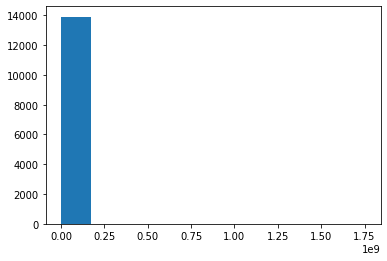

In [16]:
plt.hist(tada_eta['distance']);

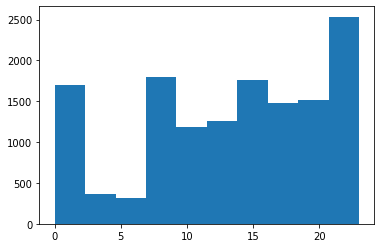

In [17]:
plt.hist(tada_eta['hour']);

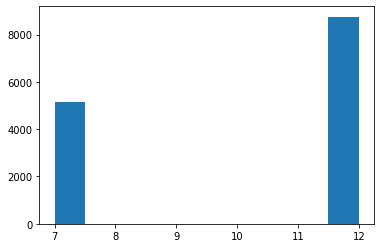

In [18]:
plt.hist(tada_eta['month']);

In [19]:
tada_eta = tada_eta[tada_eta['distance'] <= 400]
tada_eta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13908 entries, 0 to 13915
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATA       13908 non-null  float64
 1   api_eta   13908 non-null  float64
 2   month     13908 non-null  int64  
 3   hour      13908 non-null  int64  
 4   distance  13908 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 651.9 KB


## train test split

In [20]:
tada_eta = tada_eta.sample(frac=1, random_state=0).reset_index(drop=True)
train = tada_eta[:12000]
test = tada_eta[12000:]
x_train = train.drop('ATA', 1)
y_train = train['ATA']
x_test = test.drop('ATA', 1)
y_test = test['ATA']
x_train.shape, y_train.shape, x_test.shape, y_test.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


((12000, 4), (12000,), (1908, 4), (1908,))

In [22]:
X = tada_eta.drop('ATA', 1)
Y = tada_eta['ATA']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, shuffle=True, train_size=12000)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((12000, 4), (1908, 4), (12000,), (1908,))

## Random Forest

### 최적 max depth 찾기

In [21]:
mse_list = []
mse_api_list = []
mae_list = []
mae_api_list = []
for depth in range(1, 10):
  rf = RandomForestRegressor(max_depth=depth, random_state=0)
  rf.fit(x_train, y_train)
  pred = rf.predict(x_test)
  api_eta = x_test.iloc[:, 0]
  mse = mean_squared_error(y_test, pred)
  mse_api = mean_squared_error(y_test, api_eta)
  mse_list.append(mse)
  mse_api_list.append(mse_api)
  print(f'RandomForest depth : {depth}')
  print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
  mae = mean_absolute_error(y_test, pred)
  mae_api = mean_absolute_error(y_test, api_eta)
  mae_list.append(mae)
  mae_api_list.append(mae_api)
  print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )

RandomForest depth : 1
The mean squared error (MSE) on test set: 11.3019
The initial error of API ETA on test set: 14.5811
The mean absolute error (MAE) on test set: 2.4235
The initial error of API ETA on test set: 2.6952
RandomForest depth : 2
The mean squared error (MSE) on test set: 9.7517
The initial error of API ETA on test set: 14.5811
The mean absolute error (MAE) on test set: 2.1985
The initial error of API ETA on test set: 2.6952
RandomForest depth : 3
The mean squared error (MSE) on test set: 9.5234
The initial error of API ETA on test set: 14.5811
The mean absolute error (MAE) on test set: 2.1612
The initial error of API ETA on test set: 2.6952
RandomForest depth : 4
The mean squared error (MSE) on test set: 9.3330
The initial error of API ETA on test set: 14.5811
The mean absolute error (MAE) on test set: 2.1360
The initial error of API ETA on test set: 2.6952
RandomForest depth : 5
The mean squared error (MSE) on test set: 9.1981
The initial error of API ETA on test set: 1

In [24]:
mse_list = []
mse_api_list = []
mae_list = []
mae_api_list = []
for depth in range(1, 10):
  rf = RandomForestRegressor(max_depth=depth, random_state=0)
  rf.fit(X_train, Y_train)
  pred = rf.predict(X_test)
  api_eta = X_test.iloc[:, 0]
  mse = mean_squared_error(Y_test, pred)
  mse_api = mean_squared_error(Y_test, api_eta)
  mse_list.append(mse)
  mse_api_list.append(mse_api)
  print(f'RandomForest depth : {depth}')
  print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
  mae = mean_absolute_error(Y_test, pred)
  mae_api = mean_absolute_error(Y_test, api_eta)
  mae_list.append(mae)
  mae_api_list.append(mae_api)
  print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )

RandomForest depth : 1
The mean squared error (MSE) on test set: 9.7638
The initial error of API ETA on test set: 12.5065
The mean absolute error (MAE) on test set: 2.3808
The initial error of API ETA on test set: 2.6242
RandomForest depth : 2
The mean squared error (MSE) on test set: 8.0877
The initial error of API ETA on test set: 12.5065
The mean absolute error (MAE) on test set: 2.1526
The initial error of API ETA on test set: 2.6242
RandomForest depth : 3
The mean squared error (MSE) on test set: 7.5484
The initial error of API ETA on test set: 12.5065
The mean absolute error (MAE) on test set: 2.0805
The initial error of API ETA on test set: 2.6242
RandomForest depth : 4
The mean squared error (MSE) on test set: 7.4185
The initial error of API ETA on test set: 12.5065
The mean absolute error (MAE) on test set: 2.0595
The initial error of API ETA on test set: 2.6242
RandomForest depth : 5
The mean squared error (MSE) on test set: 7.3020
The initial error of API ETA on test set: 12

### 결과 df

In [25]:
dict = {'depth':list(range(1,10)), 'mse':mse_list, 'mse_api':mse_api_list, 'mae':mae_list, 'mae_api':mae_api_list}
rf_df = pd.DataFrame(dict)

In [26]:
rf_df.head()

,depth,mse,mse_api,mae,mae_api
0,1,9.763765,12.506536,2.380834,2.624198
1,2,8.087748,12.506536,2.152559,2.624198
2,3,7.548424,12.506536,2.080541,2.624198
3,4,7.418519,12.506536,2.059495,2.624198
4,5,7.301957,12.506536,2.041878,2.624198


#### 최소 MSE 값

In [27]:
rf_df[ rf_df['mse'] == rf_df['mse'].min() ]

,depth,mse,mse_api,mae,mae_api
6,7,7.184728,12.506536,2.017948,2.624198


#### 결과 시각화

In [28]:
def vis(df, model, hyper):
  plt.figure(figsize=(12,7))
  plt.grid(True)
  plt.plot(df[f'{hyper}'], df['mse'], 'o-', label='mse', linewidth=3)
  plt.plot(df[f'{hyper}'], df['mse_api'], 'o-', label='mse_api', linewidth=3)
  plt.plot(df[f'{hyper}'], df['mae'], ':', label='mae', linewidth=3)
  plt.plot(df[f'{hyper}'], df['mae_api'], ':', label='mae_api', linewidth=3)

  for i in range(df[f'{hyper}'].shape[0]):
    num_mse = df['mse'][i]
    num_mse_api = df['mse_api'][i]
    num_mae = df['mae'][i]
    num_mae_api = df['mae_api'][i]
    plt.text(df[f'{hyper}'][i], df['mse'][i], '{:.3f}'.format(num_mse), verticalalignment='bottom', fontsize=12)
    plt.text(df[f'{hyper}'][i], df['mse_api'][i], '{:.3f}'.format(num_mse_api), verticalalignment='bottom', fontsize=12)
    plt.text(df[f'{hyper}'][i], df['mae'][i], '{:.3f}'.format(num_mae), verticalalignment='bottom', fontsize=12)
    plt.text(df[f'{hyper}'][i], df['mae_api'][i], '{:.3f}'.format(num_mae_api), verticalalignment='bottom', fontsize=12)
    
  plt.title(f'{model} MSE, MAE by {hyper}', fontdict={'size':15})
  plt.xlabel(f'{hyper}', fontsize=13)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.legend(frameon=True, shadow=True, edgecolor='k', framealpha=0.5, fontsize=13);

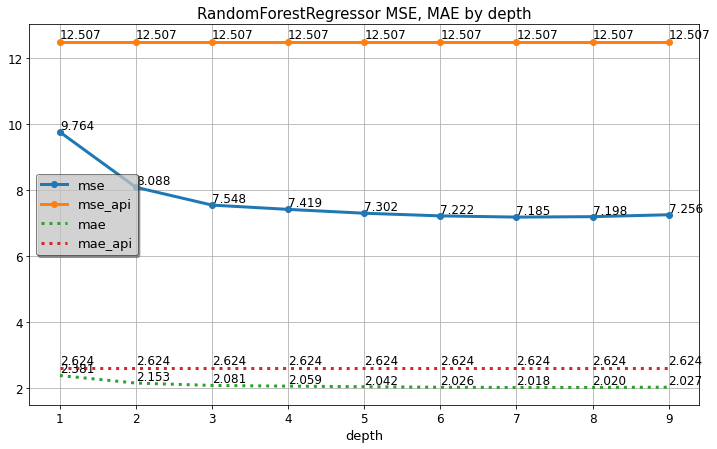

In [29]:
vis(rf_df, "RandomForestRegressor", 'depth')

### 최적의 min samples split 찾기
* 거의 변동 없어서 의미 없음

In [30]:
num_para_list = list(range(2, 20))
mse_list = []
mse_api_list = []
mae_list = []
mae_api_list = []
for samples in num_para_list:
  rf = RandomForestRegressor(max_depth=7, random_state=0, min_samples_split=samples)
  rf.fit(X_train, Y_train)
  pred = rf.predict(X_test)
  api_eta = X_test.iloc[:,0]
  mse = mean_squared_error(Y_test, pred)
  mse_api = mean_squared_error(Y_test, api_eta)
  mse_list.append(mse)
  mse_api_list.append(mse_api)
  print(f'RandomForest samples : {samples}')
  print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
  mae = mean_absolute_error(Y_test, pred)
  mae_api = mean_absolute_error(Y_test, api_eta)
  mae_list.append(mae)
  mae_api_list.append(mae_api)
  print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )
  print()

RandomForest samples : 2
The mean squared error (MSE) on test set: 7.1847
The initial error of API ETA on test set: 12.5065
The mean absolute error (MAE) on test set: 2.0179
The initial error of API ETA on test set: 2.6242

RandomForest samples : 3
The mean squared error (MSE) on test set: 7.1904
The initial error of API ETA on test set: 12.5065
The mean absolute error (MAE) on test set: 2.0186
The initial error of API ETA on test set: 2.6242

RandomForest samples : 4
The mean squared error (MSE) on test set: 7.1889
The initial error of API ETA on test set: 12.5065
The mean absolute error (MAE) on test set: 2.0189
The initial error of API ETA on test set: 2.6242

RandomForest samples : 5
The mean squared error (MSE) on test set: 7.1874
The initial error of API ETA on test set: 12.5065
The mean absolute error (MAE) on test set: 2.0188
The initial error of API ETA on test set: 2.6242

RandomForest samples : 6
The mean squared error (MSE) on test set: 7.1884
The initial error of API ETA o

In [31]:
dict2 = {'samples':num_para_list, 'mse':mse_list, 'mse_api':mse_api_list, 'mae':mae_list, 'mae_api':mae_api_list}
rf_df2 = pd.DataFrame(dict2)
rf_df2.head()

,samples,mse,mse_api,mae,mae_api
0,2,7.184728,12.506536,2.017948,2.624198
1,3,7.190413,12.506536,2.018604,2.624198
2,4,7.188853,12.506536,2.018934,2.624198
3,5,7.187355,12.506536,2.018833,2.624198
4,6,7.188368,12.506536,2.018810,2.624198


#### 최소 MSE 값

In [32]:
rf_df2[ rf_df2['mse'] == rf_df2['mse'].min() ]

,samples,mse,mse_api,mae,mae_api
17,19,7.170675,12.506536,2.017665,2.624198


#### 결과 시각화

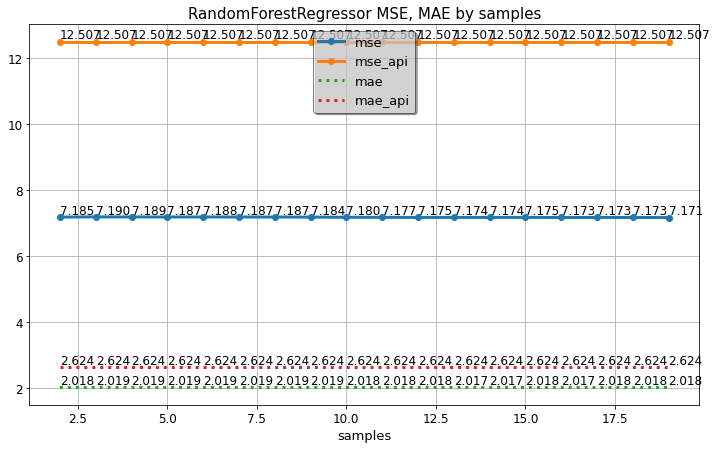

In [33]:
vis(rf_df2, "RandomForestRegressor", 'samples')

## Lighgbm

In [34]:
lgb = LGBMRegressor(n_estimators=300, random_state=0)
lgb.fit(X_train, Y_train, early_stopping_rounds=100, eval_set=[(X_test, Y_test)], eval_metric='mse')

[1]	valid_0's l2: 13.8765	valid_0's l2: 13.8765
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 12.5915	valid_0's l2: 12.5915
[3]	valid_0's l2: 11.5855	valid_0's l2: 11.5855
[4]	valid_0's l2: 10.7545	valid_0's l2: 10.7545
[5]	valid_0's l2: 10.0831	valid_0's l2: 10.0831
[6]	valid_0's l2: 9.52735	valid_0's l2: 9.52735
[7]	valid_0's l2: 9.08359	valid_0's l2: 9.08359
[8]	valid_0's l2: 8.71046	valid_0's l2: 8.71046
[9]	valid_0's l2: 8.41768	valid_0's l2: 8.41768
[10]	valid_0's l2: 8.18291	valid_0's l2: 8.18291
[11]	valid_0's l2: 7.98547	valid_0's l2: 7.98547
[12]	valid_0's l2: 7.82222	valid_0's l2: 7.82222
[13]	valid_0's l2: 7.69036	valid_0's l2: 7.69036
[14]	valid_0's l2: 7.58509	valid_0's l2: 7.58509
[15]	valid_0's l2: 7.49691	valid_0's l2: 7.49691
[16]	valid_0's l2: 7.41664	valid_0's l2: 7.41664
[17]	valid_0's l2: 7.35145	valid_0's l2: 7.35145
[18]	valid_0's l2: 7.29954	valid_0's l2: 7.29954
[19]	valid_0's l2: 7.2609	valid_0's l2: 7.2609
[20]	valid_0's l2

LGBMRegressor(n_estimators=300, random_state=0)

In [35]:
pred = lgb.predict(X_test)
api_eta = X_test.iloc[:,0]
mse = mean_squared_error(Y_test, pred)
mse_api = mean_squared_error(Y_test, api_eta)
mse_list.append(mse)
mse_api_list.append(mse_api)
print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
mae = mean_absolute_error(Y_test, pred)
mae_api = mean_absolute_error(Y_test, api_eta)
mae_list.append(mae)
mae_api_list.append(mae_api)
print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )

The mean squared error (MSE) on test set: 7.1249
The initial error of API ETA on test set: 12.5065
The mean absolute error (MAE) on test set: 2.0148
The initial error of API ETA on test set: 2.6242


## LinearRegression

In [36]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [37]:
pred = lr.predict(X_test)
api_eta = X_test.iloc[:,0]
mse = mean_squared_error(Y_test, pred)
mse_api = mean_squared_error(Y_test, api_eta)
mse_list.append(mse)
mse_api_list.append(mse_api)
print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
mae = mean_absolute_error(Y_test, pred)
mae_api = mean_absolute_error(Y_test, api_eta)
mae_list.append(mae)
mae_api_list.append(mae_api)
print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )

The mean squared error (MSE) on test set: 7.4848
The initial error of API ETA on test set: 12.5065
The mean absolute error (MAE) on test set: 2.0750
The initial error of API ETA on test set: 2.6242


## Ridge

In [38]:
alpha_list = [0.001, 0.01, 0.1, 1]
mse_list = []
mse_api_list = []
mae_list = []
mae_api_list = []
for a in alpha_list:
  rg = Ridge(alpha=a, random_state=0)
  rg.fit(X_train, Y_train)
  pred = rg.predict(X_test)
  api_eta = X_test.iloc[:,0]
  mse = mean_squared_error(Y_test, pred)
  mse_api = mean_squared_error(Y_test, api_eta)
  mse_list.append(mse)
  mse_api_list.append(mse_api)
  print(f'Ridge alpha : {a}')
  print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
  mae = mean_absolute_error(Y_test, pred)
  mae_api = mean_absolute_error(Y_test, api_eta)
  mae_list.append(mae)
  mae_api_list.append(mae_api)
  print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )
  print()

Ridge alpha : 0.001
The mean squared error (MSE) on test set: 7.4848
The initial error of API ETA on test set: 12.5065
The mean absolute error (MAE) on test set: 2.0750
The initial error of API ETA on test set: 2.6242

Ridge alpha : 0.01
The mean squared error (MSE) on test set: 7.4848
The initial error of API ETA on test set: 12.5065
The mean absolute error (MAE) on test set: 2.0750
The initial error of API ETA on test set: 2.6242

Ridge alpha : 0.1
The mean squared error (MSE) on test set: 7.4848
The initial error of API ETA on test set: 12.5065
The mean absolute error (MAE) on test set: 2.0750
The initial error of API ETA on test set: 2.6242

Ridge alpha : 1
The mean squared error (MSE) on test set: 7.4848
The initial error of API ETA on test set: 12.5065
The mean absolute error (MAE) on test set: 2.0750
The initial error of API ETA on test set: 2.6242



### 결과 df

In [39]:
dict3 = {'alpha':alpha_list, 'mse':mse_list, 'mse_api':mse_api_list, 'mae':mae_list, 'mae_api':mae_api_list}
rg_df = pd.DataFrame(dict3)

In [40]:
rg_df

,alpha,mse,mse_api,mae,mae_api
0,0.001,7.484814,12.506536,2.074968,2.624198
1,0.010,7.484814,12.506536,2.074968,2.624198
2,0.100,7.484814,12.506536,2.074968,2.624198
3,1.000,7.484814,12.506536,2.074969,2.624198


### 최소 MSE 값

In [41]:
rg_df[ rg_df['mse'] == rg_df['mse'].min() ]

,alpha,mse,mse_api,mae,mae_api
3,1.0,7.484814,12.506536,2.074969,2.624198


### 결과 시각화

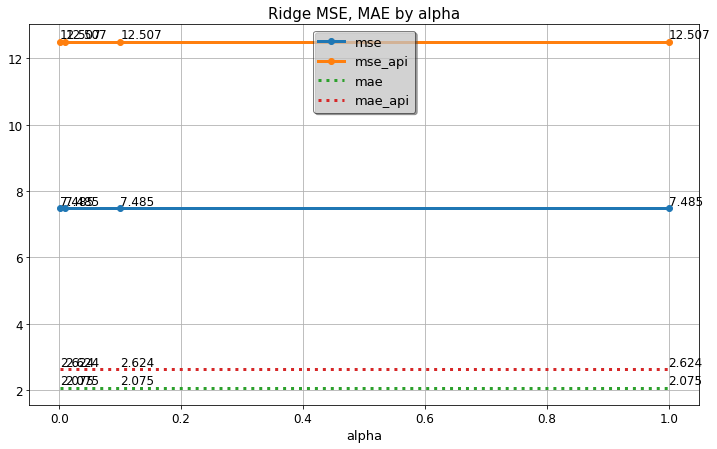

In [42]:
vis(rg_df, "Ridge", 'alpha')

## random forest와 lightgbm 결과 종합

In [43]:
# 최적의 하이퍼파라미터 적용
rf = RandomForestRegressor(max_depth=7, min_samples_split=7,random_state=0)
rf.fit(X_train, Y_train)
pred_rf = rf.predict(X_test)

In [44]:
lgb = LGBMRegressor(n_estimators=300, random_state=0)
lgb.fit(X_train, Y_train, early_stopping_rounds=100, eval_set=[(X_test, Y_test)], eval_metric='mse', verbose=False)
pred_lgb = lgb.predict(X_test)

In [45]:
pred_rf.shape, pred_lgb.shape

((1908,), (1908,))

In [46]:
pred = (pred_rf + pred_lgb) / 2

In [47]:
pred.shape

(1908,)

In [48]:
api_eta = X_test.iloc[:,0]
mse = mean_squared_error(Y_test, pred)
mse_api = mean_squared_error(Y_test, api_eta)
mse_list.append(mse)
mse_api_list.append(mse_api)
print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
mae = mean_absolute_error(Y_test, pred)
mae_api = mean_absolute_error(Y_test, api_eta)
mae_list.append(mae)
mae_api_list.append(mae_api)
print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )
print()

The mean squared error (MSE) on test set: 7.1310
The initial error of API ETA on test set: 12.5065
The mean absolute error (MAE) on test set: 2.0132
The initial error of API ETA on test set: 2.6242



# 코드 마지막